In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x_train, y_train), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, tl = nn.log["epoch_loss"], nn.log["test_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(tl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, tl, label="Test loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from Toolbox import DT2NN

sign_one_hot = DT2NN(x_train, y_train, x_test, y_test, activations=["sign", "one_hot"], n_epoch=16).fit(snapshot_ratio=0)
sign_softmax = DT2NN(x_train, y_train, x_test, y_test, activations=["sign", "softmax"], n_epoch=16).fit(snapshot_ratio=0)
tanh_softmax = DT2NN(x_train, y_train, x_test, y_test, activations=["tanh", "softmax"], n_epoch=16).fit(snapshot_ratio=0)

Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   Test :    0.818
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   Test :    0.818
------------------------------------------------------------
Epoch   16   Iter     2048   Snapshot     16 (acc)  -  Train :      1.0   Test :    0.818  -  Time Cost: 5.054159641265869
Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   Test : 0.817333
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   Test : 0.817333
------------------------------------------------------------
Epoch   16   Iter     2048   Snapshot     16 (acc)  -  Train :    0.999   Test : 0.910667  -  Time Cost: 7.363888740539551
De

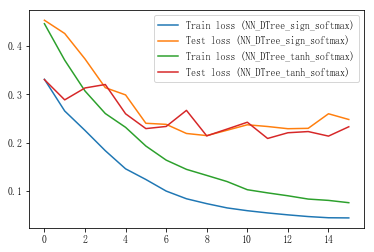

In [4]:
draw_losses(sign_softmax, tanh_softmax)